### Importamos las librerias necesarias

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

### Diseño estandar de graficas

In [55]:
sns.set(
    style="whitegrid",
    context="notebook",
    palette="dark",
)

### Cargando datos

In [56]:
data = pd.read_csv('../data/drug200.csv')

In [57]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


### Analizando los datos

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [59]:
data.shape

(200, 6)

In [60]:
data.duplicated().sum()

0

 Busqueda de datos nulos

In [61]:
data.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

### Numero de clases

In [62]:
data.Drug.value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Drug'>

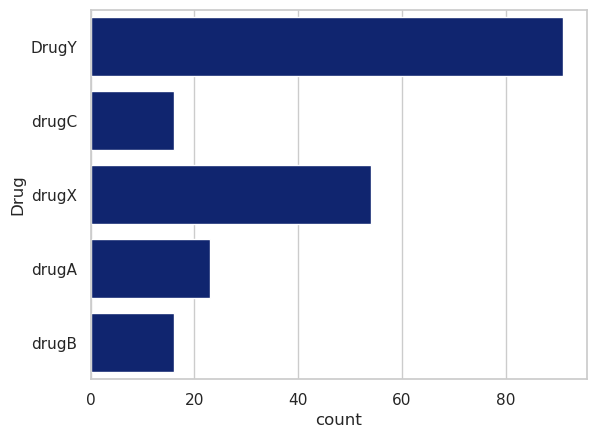

In [63]:
sns.countplot(data.Drug)

Normalmente, cuando a los modelos de clasificación se les ingesta un conjunto de datos que cuentan con un desequilibrio en el número de clases, tienden a presentar problemas, ya que el modelo de clasificación tendrá dificultades para aprender y predecir correctamente la clase minoritaria. En este caso, no podemos abordar el problema con la eliminación de instancias que pertenecen a la clase con mayor número debido a que no se cuenta con suficientes datos. Posteriormente, se verán otras posibles soluciones para abordar este problema con la selección de modelos de aprendizaje automático.

### Procesamiento de datos

In [64]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [65]:
encoder = OrdinalEncoder()
data_categoric = data[["Sex", "BP", "Cholesterol", "Drug"]]
data_categoric = encoder.fit_transform(data_categoric.values.reshape(-1, 4))

In [66]:
# nesecito ver los valores asignados a cada categoria
encoder.categories_


[array(['F', 'M'], dtype=object),
 array(['HIGH', 'LOW', 'NORMAL'], dtype=object),
 array(['HIGH', 'NORMAL'], dtype=object),
 array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)]

In [67]:
data_categoric = pd.DataFrame(data_categoric)
data_categoric.columns = data[["Sex", "BP", "Cholesterol", "Drug"]].columns
data_categoric = data_categoric.astype(int)

In [68]:
data[["Sex", "BP", "Cholesterol", "Drug"]] = data_categoric
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


### Visualzacion de correlacion 

<Axes: >

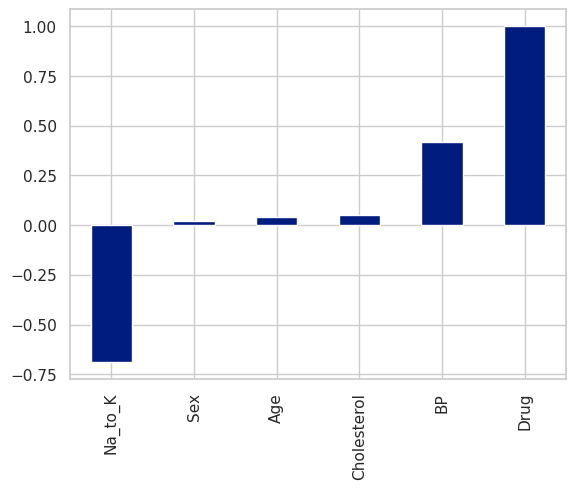

In [69]:
data.corr()["Drug"].sort_values(ascending=True).plot(kind="bar") # <-- Generando grafico 

<Axes: >

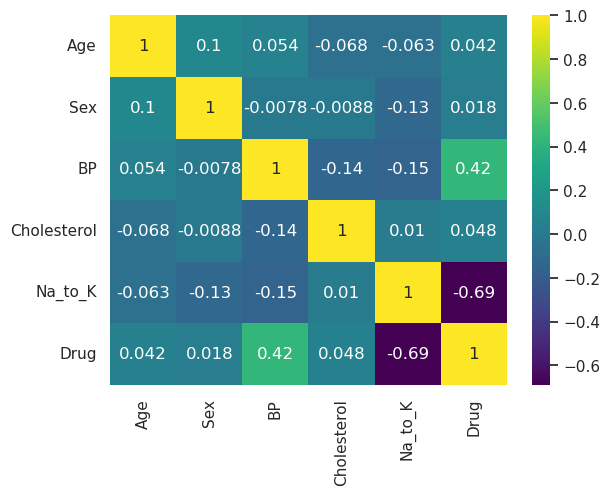

In [70]:
sns.heatmap(data.corr(), annot=True, cmap="viridis")

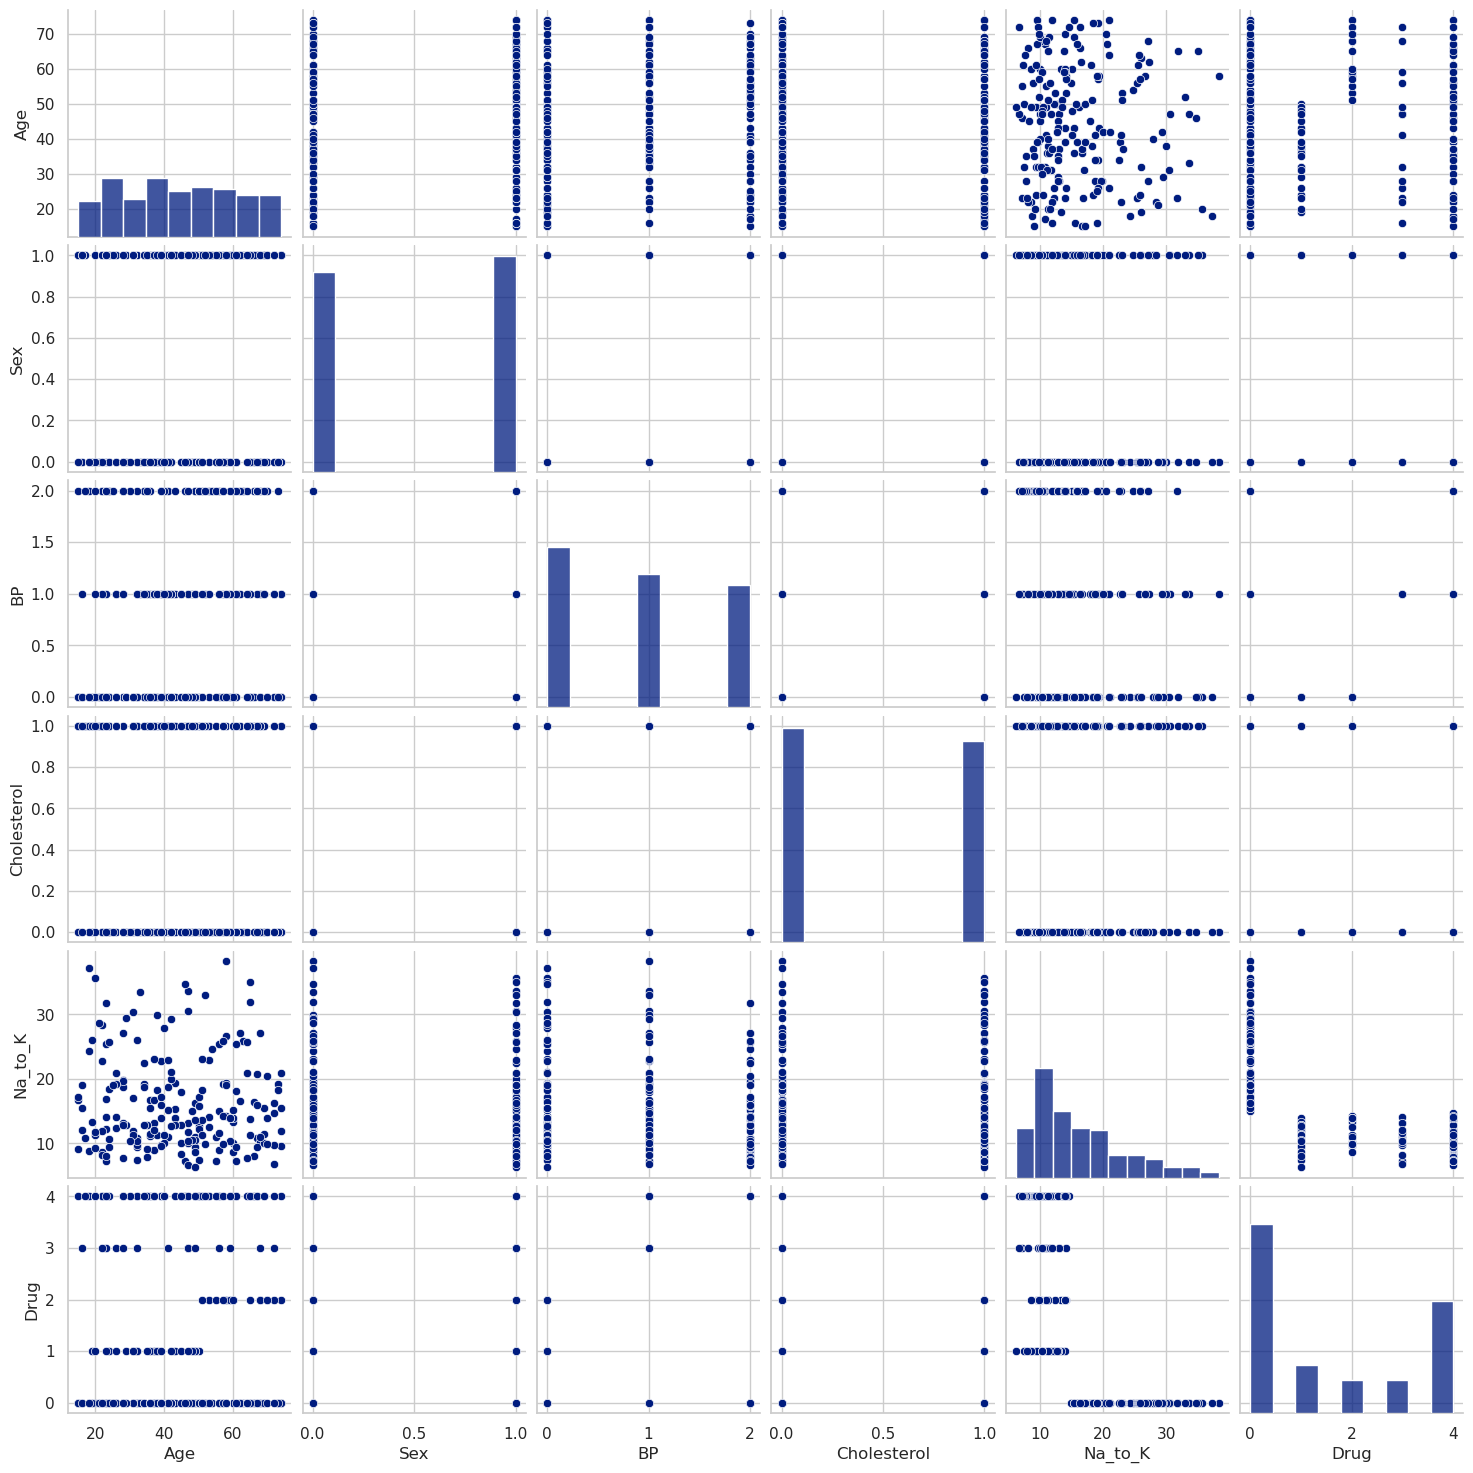

In [71]:
sns.pairplot(data)

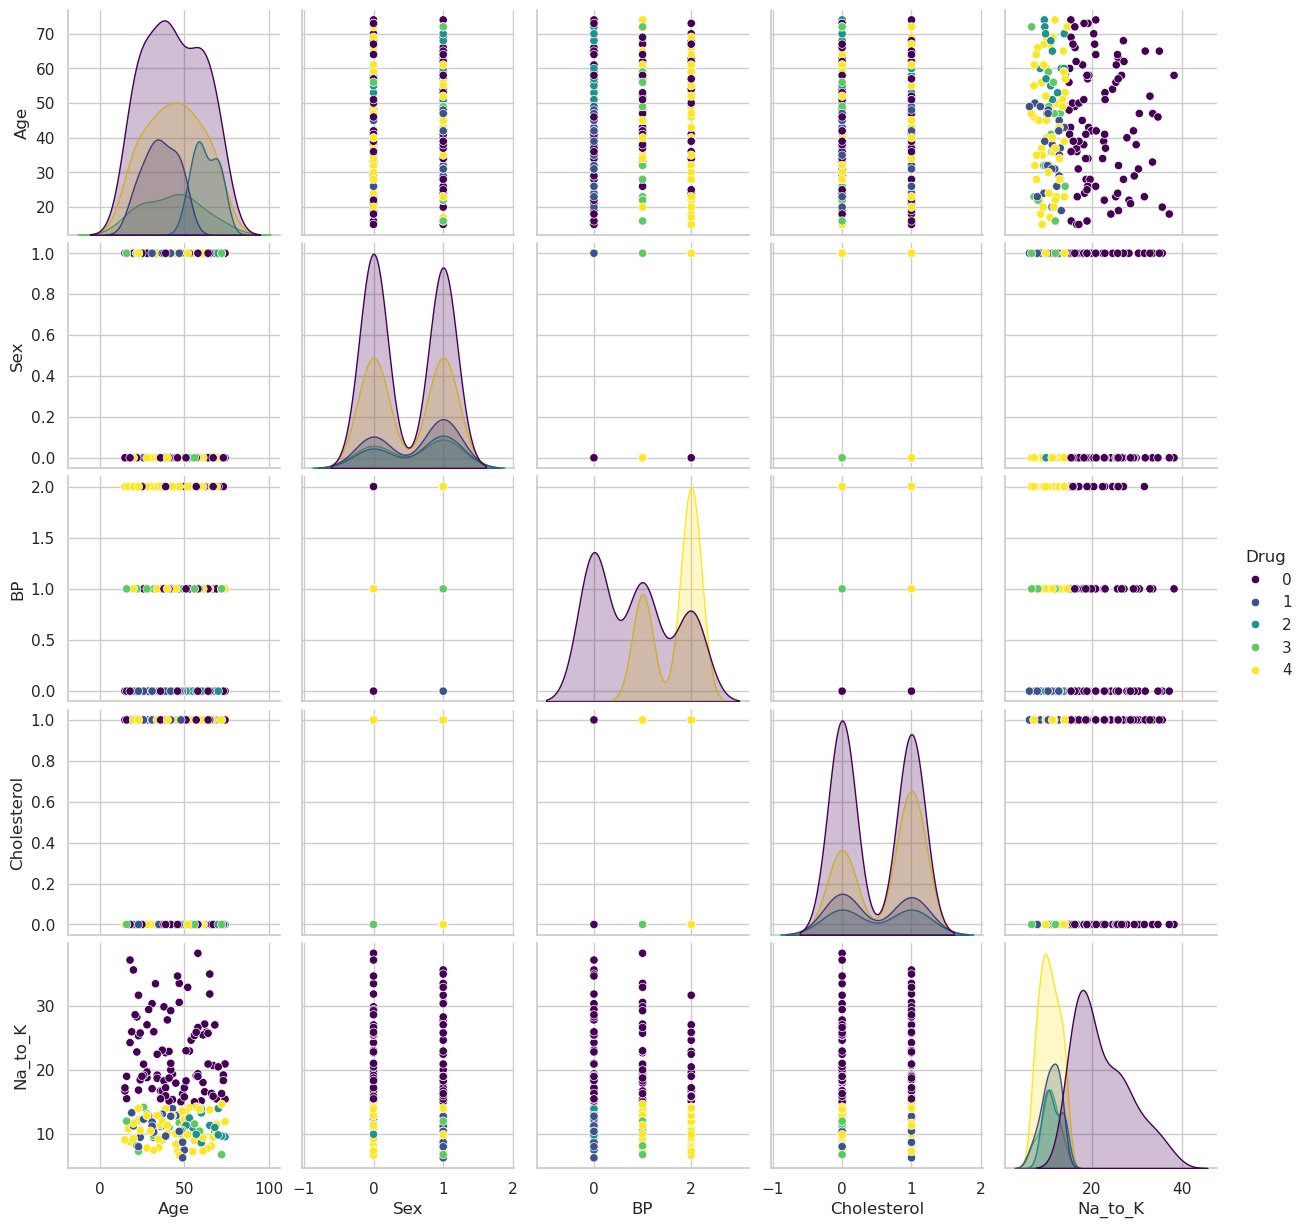

In [72]:
sns.pairplot(data, hue="Drug", palette="viridis")

### Split y Escalamiento de datos

In [73]:
X = data.drop("Drug", axis=1)
Y = data["Drug"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True , random_state=42)

scaler_x = MinMaxScaler()

X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)



In [74]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': range(3,9),
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}
    
param_lr = {

    'C': [0.01, 0.1, 1],  # Valores de hiperparámetro 'C'
    'penalty': ['l2','l1'], # Tipos de penalización
    'solver': ['sag','saga'],
    'multi_class':["ovr","multinomial"],    
}

In [75]:
model_rf = RandomForestClassifier()
model_lr = LogisticRegression()

El parámetro `n_jobs` en GridSearchCV y otros estimadores en scikit-learn controla la cantidad de procesadores que se utilizan para ejecutar paralelamente los cálculos durante la validación cruzada y el ajuste de modelos. Específicamente, cuando n_jobs está configurado en -1, scikit-learn utilizará todos los núcleos disponibles en tu CPU para procesar tareas en paralelo.

In [76]:
grid_search_rf = GridSearchCV(
    estimator=model_rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
    )

In [77]:
grid_search_lr = GridSearchCV(
    estimator=model_lr,
    param_grid=param_lr,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
    )

In [78]:
grid_search_lr.fit(X_train, Y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/home/cristian/anaconda3/envs/Data_Science/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/cristian/anaconda3/envs/Data_Science/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/cristian/anaconda3/envs/Data_Science/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/cristian/anaconda3/envs/Data_Science/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/cristian/anaconda3/envs/Data_Science/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l2', 'l1'], 'solver': ['sag', 'saga']},
             scoring='accuracy', verbose=1)

In [79]:
grid_search_lr.best_score_

0.90625

In [80]:
grid_search_lr.best_params_

{'C': 1, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}

In [81]:
model_lr = grid_search_lr.best_estimator_

In [82]:
grid_search_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': [None, 'balanced',
                                          'balanced_subsample'],
                         'max_depth': range(3, 9),
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

In [83]:
grid_search_rf.best_score_

0.99375

In [84]:
grid_search_rf.best_params_

{'bootstrap': True, 'class_weight': None, 'max_depth': 6, 'n_estimators': 50}

In [85]:
model_rf = grid_search_rf.best_estimator_

### Evaluando a los modelos 

In [89]:
Y_pred_train_lr = model_lr.predict(X_train)
Y_pred_train_rf = model_rf.predict(X_train)

print(f"Accuracy Logistic Regression: {accuracy_score(Y_train, Y_pred_train_lr)*100} %")
print(f"Accuracy Random Forest: {accuracy_score(Y_train, Y_pred_train_rf)*100} %")

Accuracy Logistic Regression: 94.375 %
Accuracy Random Forest: 100.0 %


In [90]:
y_pred_lr = model_lr.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

print(f"Accuracy Logistic Regression: {accuracy_score(Y_test, y_pred_lr)*100} %")
print(f"Accuracy Random Forest: {accuracy_score(Y_test, y_pred_rf)*100} %")

Accuracy Logistic Regression: 97.5 %
Accuracy Random Forest: 100.0 %


De los modelos previamente mencionados, el de Random Forest está mostrando signos de sobreajuste. Por otro lado, el modelo de Regresión Logística está arrojando resultados sólidos en términos de métricas de evaluación. Por lo tanto, se considera que este último es el más adecuado para llevar a cabo las predicciones.

### Matriz de confusion

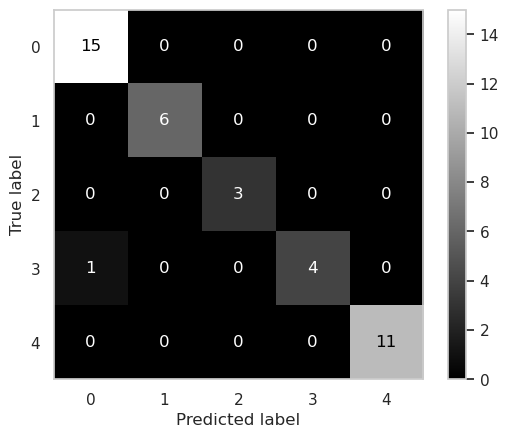

In [88]:
cm = confusion_matrix(Y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_lr.classes_)
disp.plot(cmap="gray")
plt.grid(False)